Plot for complete markets

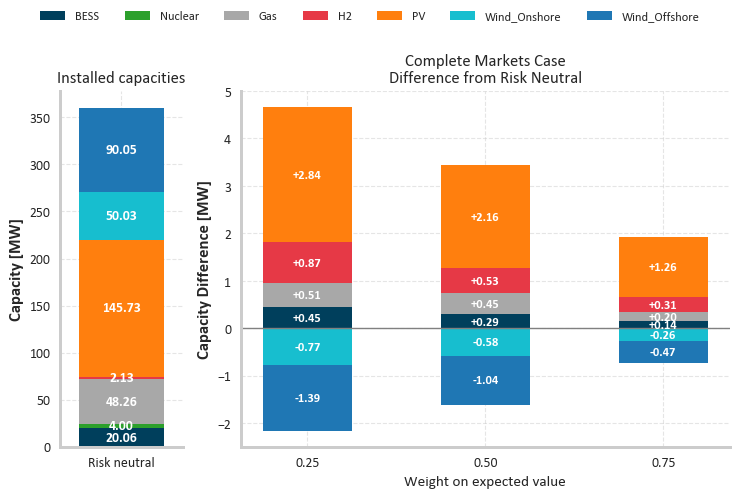

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams['patch.edgecolor'] = 'none'
rcParams['patch.linewidth'] = 0
rcParams['patch.antialiased'] = False  # optional: avoids hairline gaps on some backends

# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['axes.labelweight'] = 'bold'

# === Load data ===
# Update paths
df_raw = pd.read_csv(r"...\risk_aversion_results.csv")
df = df_raw[df_raw["delta"] != 0]

# === Filter relevant columns ===
capacity_cols = ['PV', 'Gas', 'Wind_Onshore', 'Wind_Offshore', 'Nuclear', 'BESS_P', 'H2_P']
df = df[['delta'] + capacity_cols]

# === Split data ===
df_rn = df[df['delta'] == 1].iloc[0]
df_others = df[df['delta'] != 1].sort_values('delta')

# === Define techs, labels, and colors ===
techs = ['BESS_P', 'Nuclear',  'Gas', 'H2_P', 'PV', 'Wind_Onshore', 'Wind_Offshore']
labels = ['BESS', 'Nuclear',  'Gas', 'H2', 'PV', 'Wind_Onshore', 'Wind_Offshore']
#techs = ['BESS_P', 'LDES_PHS_P']
#labels = ['BESS', 'PHS']
#colors = {
#    'BESS_P': '#4e79a7',       # Blue
#    'Wind_Offshore': '#af7aa1',          # Violet
#    'Nuclear': "#73ef63",      # Gray
#    'LDES_PHS_P': '#e15759',   # Red
#    'PV': '#f28e2b',           # Orange
#    'Wind_Onshore': '#76c7c0',         # Teal
#    'Gas': "#bab0ac"
#}
colors = {
    'BESS_P': '#003f5c',         # Blue
    'Nuclear': '#2ca02c',        # Green
    'Gas': '#a8a8a8',            # Light Gray
    'H2_P': '#e63946',     # Lighter Red
    'PV': '#ff7f0e',  #ff9933           # Orange
    'Wind_Onshore': '#17becf',   # Teal-Cyan
    'Wind_Offshore': '#1f77b4'   # Slightly darker Teal-Cyan
}

# === Plot setup ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 5), gridspec_kw={'width_ratios': [1, 4]}) # itan 1 4

for ax in [ax1, ax2]:
    ax.spines[['top', 'right']].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)

# === Left: Risk Neutral ===
bar_width = 0.35
bottom = 0
for tech in techs:
    value = df_rn[tech]
    ax1.bar(0.25, value, width=bar_width, bottom=bottom, color=colors[tech])
    #ax1.bar(0, value, width=bar_width, bottom=bottom, color=colors[tech])
    if value > 1:
        ax1.text(0.25, bottom + value / 2, f'{value:.2f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    bottom += value
ax1.set_xticks([0.25])
ax1.set_xlim(0, 0.5)
ax1.set_xticklabels(['Risk neutral'], fontsize=10)
ax1.set_ylabel("Capacity [MW]", fontsize=12, fontweight='bold')
ax1.set_title("Installed capacities", fontsize=12, fontweight='normal')
ax1.tick_params(labelsize=10)

# === Right: Differences ===
deltas = df_others['delta'].unique()
x = np.arange(len(deltas))
width = 0.5

bottom_pos = np.zeros_like(x, dtype=float)
bottom_neg = np.zeros_like(x, dtype=float)

for tech in techs:
    diffs = df_others[tech].values - df_rn[tech]
    for i, diff in enumerate(diffs):
        if diff >= 0.01:
            #ax2.bar(x[i], diff, width=width, bottom=bottom_pos[i], color=colors[tech])
            alpha = 0.4 if tech == 'Wind_Onshore' else 0.8 if tech == 'Wind_Offshore' else 0.9 if tech == 'PV' else 0.9 if tech == 'LDES_PHS_P' else 1.0 if tech == 'BESS_P' else 0.7 if tech == 'Gas' else 1.0
            ax2.bar(x[i], diff, width=width, bottom=bottom_pos[i], color=colors[tech])
            
            if abs(diff) > 0.04 and abs(diff) < 0.1:
                ax2.text(x[i], bottom_pos[i] + diff / 20, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            else:
                ax2.text(x[i], bottom_pos[i] + diff / 2, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            #if abs(diff) < 0.9 and abs(diff) > 0.5:
            #    ax2.text(x[i], bottom_pos[i] + diff / 3.5, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            #if abs(diff) < 0.5 and abs(diff) > 0.3:
            #    ax2.text(x[i], bottom_pos[i] - diff/10 , f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            bottom_pos[i] += diff
        else:
            alpha = 0.4 if tech == 'Wind_Onshore' else 0.8 if tech == 'Wind_Offshore' else 0.9 if tech == 'PV' else 0.9 if tech == 'LDES_PHS_P' else 1.0 if tech == 'BESS_P' else 0.7 if tech == 'Gas' else 1.0
            ax2.bar(x[i], diff, width=width, bottom=bottom_neg[i], color=colors[tech])
            #ax2.text(x[i], bottom_neg[i] + diff / 2, f'{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            if abs(diff) > 0.1:
                ax2.text(x[i], bottom_neg[i] + diff / 2, f'{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            bottom_neg[i] += diff

ax2.set_xticks(x)
ax2.set_xticklabels([f"{d:.2f}" for d in deltas], fontsize=10)
ax2.set_xlabel("Weight on expected value", fontsize=11, fontweight='normal')
ax2.set_ylabel("Capacity Difference [MW]", fontsize=12, fontweight='bold')
ax2.set_title("Complete Markets Case\nDifference from Risk Neutral", fontsize=12, fontweight='normal')
ax2.axhline(0, color='gray', linewidth=1)

from matplotlib.patches import Rectangle
import matplotlib.lines as mlines

# === Legend ===
#handles = [plt.Rectangle((0, 0), 1, 1, color=colors[t]) for t in techs]
#fig.legend(handles, labels, loc='upper center', ncol=len(techs), fontsize=9, frameon=False)
handles = [Rectangle((0, 0), 1, 1, facecolor=colors[t], edgecolor='black') for t in techs]
fig.legend(handles, labels, loc='upper center', ncol=len(techs), fontsize=9, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

fig.savefig("complete.png", dpi=400, bbox_inches='tight')

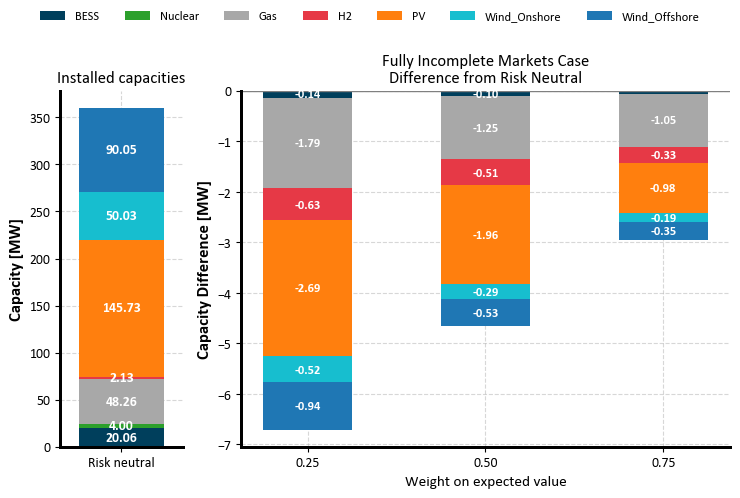

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams['patch.edgecolor'] = 'none'
rcParams['patch.linewidth'] = 0
rcParams['patch.antialiased'] = False  # optional: avoids hairline gaps on some backends


# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['axes.labelweight'] = 'bold'

# === Load data ===
#Update paths
df_raw = pd.read_csv(r"...\H2_15000_ADMM_risk_aversion_results.csv")
df = df_raw[df_raw["delta"] != 0]

# === Filter relevant columns ===
capacity_cols = ['PV', 'Gas', 'Wind_Onshore', 'Wind_Offshore', 'Nuclear', 'BESS_P', 'H2_P']
df = df[['delta'] + capacity_cols]

# === Split data ===
df_rn = df[df['delta'] == 1].iloc[0]
df_others = df[df['delta'] != 1].sort_values('delta')

# === Define techs, labels, and colors ===
techs = ['BESS_P', 'Nuclear',  'Gas', 'H2_P', 'PV', 'Wind_Onshore', 'Wind_Offshore']
labels = ['BESS', 'Nuclear',  'Gas', 'H2', 'PV', 'Wind_Onshore', 'Wind_Offshore']
#techs = ['BESS_P', 'LDES_PHS_P']
#labels = ['BESS', 'PHS']
#colors = {
#    'BESS_P': '#4e79a7',       # Blue
#    'Wind_Offshore': '#af7aa1',          # Violet
#    'Nuclear': "#73ef63",      # Gray
#    'LDES_PHS_P': '#e15759',   # Red
#    'PV': '#f28e2b',           # Orange
#    'Wind_Onshore': '#76c7c0',         # Teal
#    'Gas': "#bab0ac"
#}
colors = {
    'BESS_P': '#003f5c',         # Blue
    'Nuclear': '#2ca02c',        # Green
    'Gas': '#a8a8a8',            # Light Gray
    'H2_P': '#e63946',     # Lighter Red
    'PV': '#ff7f0e',  #ff9933           # Orange
    'Wind_Onshore': '#17becf',   # Teal-Cyan
    'Wind_Offshore': '#1f77b4'   # Slightly darker Teal-Cyan
}

# === Plot setup ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 5), gridspec_kw={'width_ratios': [1, 4]}) # itan 1 4

for ax in [ax1, ax2]:
    ax.spines[['top', 'right']].set_visible(False)
    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    ax.set_axisbelow(True)

# === Left: Risk Neutral ===
bar_width = 0.35
bottom = 0
for tech in techs:
    value = df_rn[tech]
    ax1.bar(0.25, value, width=bar_width, bottom=bottom, color=colors[tech])
    #ax1.bar(0, value, width=bar_width, bottom=bottom, color=colors[tech])
    if value > 1:
        ax1.text(0.25, bottom + value / 2, f'{value:.2f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    bottom += value
ax1.set_xticks([0.25])
ax1.set_xlim(0, 0.5)
ax1.set_xticklabels(['Risk neutral'], fontsize=10)
ax1.set_ylabel("Capacity [MW]", fontsize=12, fontweight='bold')
ax1.set_title("Ιnstalled capacities", fontsize=12, fontweight='normal')
ax1.tick_params(labelsize=10)

# === Right: Differences ===
deltas = df_others['delta'].unique()
x = np.arange(len(deltas))
width = 0.5

bottom_pos = np.zeros_like(x, dtype=float)
bottom_neg = np.zeros_like(x, dtype=float)

for tech in techs:
    diffs = df_others[tech].values - df_rn[tech]
    for i, diff in enumerate(diffs):
        if diff >= 0.01:
            #ax2.bar(x[i], diff, width=width, bottom=bottom_pos[i], color=colors[tech])
            alpha = 0.4 if tech == 'Wind_Onshore' else 0.8 if tech == 'Wind_Offshore' else 0.9 if tech == 'PV' else 0.9 if tech == 'LDES_PHS_P' else 1.0 if tech == 'BESS_P' else 0.7 if tech == 'Gas' else 1.0
            ax2.bar(x[i], diff, width=width, bottom=bottom_pos[i], color=colors[tech])
            
            if abs(diff) > 0.04 and abs(diff) < 0.1:
                ax2.text(x[i], bottom_pos[i] + diff / 20, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            else:
                ax2.text(x[i], bottom_pos[i] + diff / 2, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            #if abs(diff) < 0.9 and abs(diff) > 0.5:
            #    ax2.text(x[i], bottom_pos[i] + diff / 3.5, f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            #if abs(diff) < 0.5 and abs(diff) > 0.3:
            #    ax2.text(x[i], bottom_pos[i] - diff/10 , f'+{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            bottom_pos[i] += diff
        else:
            alpha = 0.4 if tech == 'Wind_Onshore' else 0.8 if tech == 'Wind_Offshore' else 0.9 if tech == 'PV' else 0.9 if tech == 'LDES_PHS_P' else 1.0 if tech == 'BESS_P' else 0.7 if tech == 'Gas' else 1.0
            ax2.bar(x[i], diff, width=width, bottom=bottom_neg[i], color=colors[tech])
            #ax2.text(x[i], bottom_neg[i] + diff / 2, f'{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            if abs(diff) > 0.1:
                ax2.text(x[i], bottom_neg[i] + diff / 2, f'{diff:.2f}', ha='center', va='center', fontsize=9, color='white',fontweight='bold')
            bottom_neg[i] += diff

ax2.set_xticks(x)
ax2.set_xticklabels([f"{d:.2f}" for d in deltas], fontsize=10)
ax2.set_xlabel("Weight on expected value", fontsize=11, fontweight='normal')
ax2.set_ylabel("Capacity Difference [MW]", fontsize=12, fontweight='bold')
ax2.set_title("Fully Incomplete Markets Case\nDifference from Risk Neutral", fontsize=12, fontweight='normal')
ax2.axhline(0, color='gray', linewidth=1)

from matplotlib.patches import Rectangle
import matplotlib.lines as mlines

# === Legend ===
#handles = [plt.Rectangle((0, 0), 1, 1, color=colors[t]) for t in techs]
#fig.legend(handles, labels, loc='upper center', ncol=len(techs), fontsize=9, frameon=False)
handles = [Rectangle((0, 0), 1, 1, facecolor=colors[t], edgecolor='black') for t in techs]
fig.legend(handles, labels, loc='upper center', ncol=len(techs), fontsize=9, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

fig.savefig("inomplete_new.png", dpi=400, bbox_inches='tight')

| Metric         | Based on          | What it Tells You                                                                            |
| -------------- | ----------------- | -------------------------------------------------------------------------------------------- |
| `total_demand` | `weighted_demand` | Total energy consumed over the year (in MWh), accounting for weights (e.g., time fractions). |
| `max_load`     | `load`            | Highest instantaneous demand (e.g., peak in MW).                                             |
| `min_load`     | `load`            | Lowest observed demand.                                                                      |
| `mean_load`    | `load`            | Average demand across all time steps.                                                        |
| `median_load`  | `load`            | The "middle" value — half the values are above, half below.                                  |
| `std_load`     | `load`            | Standard deviation — how much demand fluctuates around the mean.                             |
| `range_load`   | `load`            | Difference between max and min — indicates spread.                                           |
| `p10_load`     | `load`            | 10th percentile — 10% of values are below this.                                              |
| `p90_load`     | `load`            | 90th percentile — 90% of values are below this.                                              |


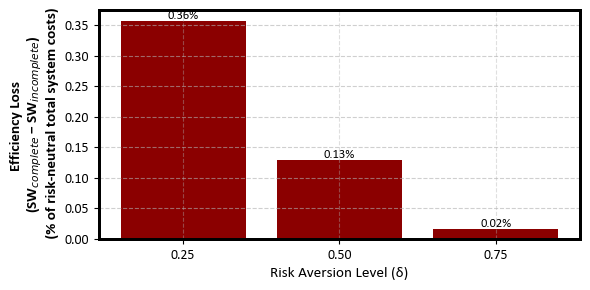

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from matplotlib.ticker import PercentFormatter

# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['axes.labelweight'] = 'bold'

# === Replace these with your actual values ===
deltas = [0.25, 0.5, 0.75]
#riskneutral_sw = 4.729353512329049e9
#sw_complete = [4.699031359803693e9, 4.709140350445262e9, 4.71923429212195e9]       # example social welfare values
#sw_incomplete = [4.698587852200662e9, 4.708974276447182e9,4.719302206668786e9 ]      # example values

#like adam's paper (risk adjusted welfare complete - risk adjusted welfare complete incomplete)/total costs
riskneutral_sw = 87911701.85#/2.5
sw_complete = [4.699031359803693e9,   4.709140350445262e9, 4.71923429212195e9]       # example social welfare values
sw_incomplete = [4.698717192323164e9, 4.709027016274159e9,4.7192202206668786e9 ] 


eff_loss_abs = np.array(sw_complete) - np.array(sw_incomplete)

eff_loss_pct = (eff_loss_abs / riskneutral_sw) * 100.0 


# === Plotting ===
fig, ax = plt.subplots(figsize=(6, 3))

bars = ax.bar(deltas, eff_loss_pct, width=0.2, color='#8B0000', edgecolor='black')

# Labels and grid
ax.set_ylabel("Efficiency Loss \n(SW$_{complete}$ − SW$_{incomplete}$)\n (% of risk-neutral total system costs)", fontsize=11, fontweight='bold')
ax.set_xlabel("Risk Aversion Level (δ)", fontsize=11, fontweight='normal')
ax.set_xticks(deltas)
ax.set_xticklabels([f"{d:.2f}" for d in deltas])
#ax.set_title("Social Welfare (SW) vs risk-aversion", fontsize=11)
#ax.yaxis.set_major_formatter(PercentFormatter(xmax=100))

# Gridlines on both axes
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
ax.grid(True, axis='x', linestyle='--', alpha=0.4)

# Bar labels (e.g., 0.003%)
for rect, val in zip(bars, eff_loss_pct):
    y = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, y,
            f"{val:.2f}%", ha='center', va='bottom', fontsize=9)
    
plt.tight_layout()
plt.savefig("socialwelfare_new.png", dpi=400, bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['axes.labelweight'] = 'bold'

# === Load files (adjust paths if needed) ===
# Update with correct paths
cf = pd.read_csv(r"...\concatenated_capacity_factors_672_30yr_new_lf.csv")
demand = pd.read_csv(r"...\concatenated_load_profiles_672_30yr_new.csv")
weights = pd.read_csv(r"...\concatenated_weights_672_30yr_new.csv")

# Make sure scenarios are correct and all included
total_scenarios = [19, 12, 7, 11, 23, 8, 30, 24, 1, 26, 29, 13, 4, 22, 27]

# Filter
cf = cf[cf["O"].isin(total_scenarios)].copy()
weights = weights[weights["O"].isin(total_scenarios)].copy()

# Pivot CF to wide [PV, Wind_Onshore, Wind_Offshore]
cf_wide = cf.pivot_table(index=["O","T"], columns="G", values="value").reset_index()

# Merge weights (rename for clarity)
wt = weights.rename(columns={"value":"weight"})
df = cf_wide.merge(wt, on=["O","T"], how="inner")

# Keep only the technologies present
techs = [c for c in ["PV", "Wind_Onshore", "Wind_Offshore"] if c in df.columns]

# Optional multipliers + cap at 1.0
X1, X2, X3 = 1.0, 1.0, 1.0
mult = pd.Series({"PV": X1, "Wind_Onshore": X2, "Wind_Offshore": X3})
for col in techs:
    if col in mult.index:
        df[col] = (df[col] * mult[col]).clip(upper=1.0)

#print(df.columns)

# === Time-weighted annual CF per scenario ===
# CF_{G,o} = sum_t w_t * cf_{G,t,o} / sum_t w_t
w_sum = df.groupby("O")["weight"].sum()
num   = df[techs].mul(df["weight"], axis=0).groupby(df["O"]).sum()
per_scn_cf = num.div(w_sum, axis=0).reset_index().rename(columns={"O":"scenario"})

# === Summary stats table (for thesis / appendix) ===
summary = per_scn_cf[techs].agg(["mean","median","min","max","std"]).T
summary = summary.rename(columns={
    "mean":"Mean", "median":"Median", "min":"Min", "max":"Max", "std":"Std. dev."
})
summary_rounded = summary.round(3)
print(summary_rounded)


                Mean  Median    Min    Max  Std. dev.
PV             0.109   0.110  0.105  0.111      0.002
Wind_Onshore   0.291   0.289  0.265  0.344      0.021
Wind_Offshore  0.381   0.382  0.357  0.430      0.021


C:\Users\user\AppData\Local\Temp\ipykernel_24096\1546393924.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\user\AppData\Local\Temp\ipykernel_24096\1546393924.py:188: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['a) $H_{2}$', 'b) Wind Offshore', 'c) Wind Onshore', 'd) PV', 'e) Gas', 'f) BESS'], fontsize=11)


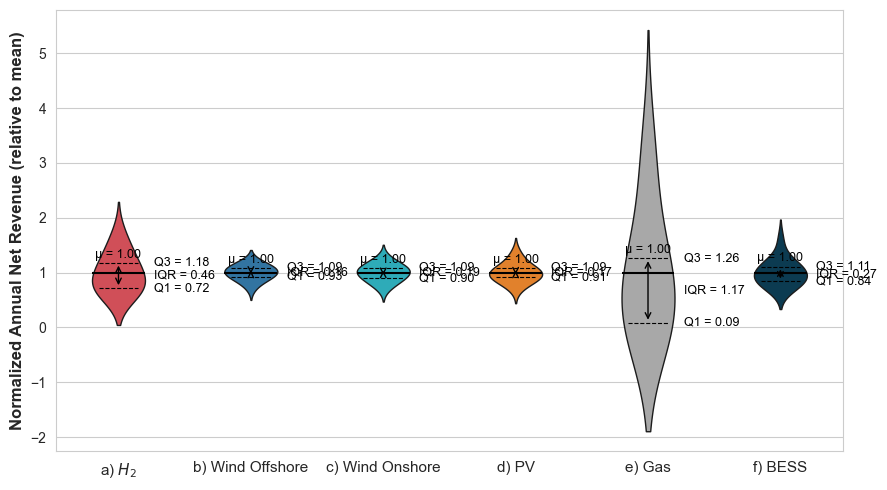

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# === Global font setup ===
rcParams['font.family'] = 'Calibri'
rcParams['axes.labelweight'] = 'bold'
sns.set_style("whitegrid")

# === Revenue data ===
ldes_revenue = [
    1161488.501, 1501133.276, 618722.9102, 1119871.887, 655255.6104,
    671269.4626, 1120988.811, 686365.2323, 992130.1527, 854546.4378,
    705607.2075, 723114.2518, 751057.2526, 1641761.313, 1316768.364
]

wind_offshore_revenue = [
    22606753.61, 31285180.89, 27071072.22, 23182890.61, 19351075.09,
    29580673.88, 28451056.3, 25418342, 24119230.21, 31753236.87,
    26276421.33, 26005490.88, 27474021.54, 27974040.29, 30002949.57
]
wind_onshore_revenue = [
    10158434.57,
    13259977.37,
    11414165.4,
    9767929.437,
    8579439.071,
    12400236.33,
    12287555.29,
    11245713.21,
    10062037.81,
    13715447.77,
    11839543.77,
    11936352.92,
    12562424.15,
    14892888.45,
    13767944.98
]
pv_revenue = [
    17187237.39,
    19876915.26,
    14725351.11,
    13025697.66,
    11439488.64,
    16189238.84,
    17257135.69,
    14682651.7,
    14247039.93,
    17354311.39,
    15701459.31,
    13673750.99,
    15084893.9,
    15689206.77,
    21389868.1
]

gas_revenue = [
    1.5911400586624794e7,
    4.027167001648055e7,
    1.1372735611777306e6,
    1.2900932211750947e7,
    731478.7816373184,
    1.5677495195902176e6,
    1.3302888402892396e7,
    764369.0440078154,
    9.131226842962597e6,
    9.701774160717532e6,
    652432.398808226,
    911422.0936854631,
    4.763277474064108e6,
    3.3087464462166585e7,
    2.9026609797722273e7
]

bess_revenue = [
    5.553270057998465e6,
    5.841978707730084e6,
    4.1205131667567464e6,
    4.841816557309693e6,
    4.205918516463605e6,
    3.507748517927688e6,
    5.280191461208627e6,
    3.8381634870530716e6,
    5.264652075614263e6,
    4.877843936378861e6,
    4.063884898891248e6,
    4.372118064339865e6,
    3.9901711526757064e6,
    7.725518133621426e6,
    5.675414536429983e6
]


# === Installed capacity (MW) ===
ldes_capacity_mw = 1.51
wind_capacity_mw = 89.50
wind_on = 49.73
pvcap = 143.86
gascap = 47.52
besscap = 19.92

# === Normalize revenue per MW ===
ldes_revenue_per_mw = [r / ldes_capacity_mw for r in ldes_revenue]
wind_revenue_per_mw = [r  / wind_capacity_mw for r in wind_offshore_revenue] #* 1.475859063
wind_on_revenue_per_mw = [r / wind_on for r in wind_onshore_revenue]
pv_revenue_per_mw = [r / pvcap for r in pv_revenue]
gas_revenue_per_mw = [r / gascap for r in gas_revenue]
bess_revenue_per_mw = [r / besscap for r in bess_revenue]

# === Normalize each tech by its own mean ===
ldes_mean = np.mean(ldes_revenue_per_mw)
wind_mean = np.mean(wind_revenue_per_mw)
wind_on_mean = np.mean(wind_on_revenue_per_mw)
pv_mean = np.mean(pv_revenue_per_mw)
gas_mean = np.mean(gas_revenue_per_mw)
bess_mean = np.mean(bess_revenue_per_mw)

ldes_normalized = [r / ldes_mean for r in ldes_revenue_per_mw]
wind_normalized = [r / wind_mean for r in wind_revenue_per_mw]
wind_on_normalized = [r / wind_on_mean for r in wind_on_revenue_per_mw]
pv_normalized = [r / pv_mean for r in pv_revenue_per_mw]
gas_normalized = [r / gas_mean for r in gas_revenue_per_mw]
bess_normalized = [r / bess_mean for r in bess_revenue_per_mw]

# === Combine ===
data = pd.DataFrame({
    'Technology': ['$H_{2}$'] * 15 + ['Wind Offshore'] * 15 + ['Wind Onshore']*15 + ['PV']*15 + ['Gas']*15 + ['BESS']*15,
    'Normalized Revenue': ldes_normalized + wind_normalized + wind_on_normalized + pv_normalized + gas_normalized + bess_normalized
})

# === Plot ===
palette = {
    '$H_{2}$': '#e63946',         # greenish
    'Wind Offshore': '#1f77b4',   # orange
    'Wind Onshore': '#17becf',    # blue
    'PV': '#ff7f0e',               # pink
    'Gas': '#a8a8a8',
    'BESS': '#003f5c'
}

fig, ax = plt.subplots(figsize=(9, 5))
sns.violinplot(
    data=data,
    x="Technology",
    y="Normalized Revenue",
    palette=palette,
    inner=None,
    cut=2,
    width=0.4,
    linewidth=1,
    bw_adjust=1.5, #smoothing parameter (lower = more details)
    ax=ax
)

# --- Add clean stats ---
for i, tech in enumerate(['$H_{2}$', 'Wind Offshore','Wind Onshore','PV', 'Gas', 'BESS']):
    values = data[data['Technology'] == tech]['Normalized Revenue']
    mean = values.mean()
    q25 = values.quantile(0.25)
    median = values.median()
    q75 = values.quantile(0.75)

    # Lines
    ax.hlines(mean, i - 0.2, i + 0.2, colors='black', linewidth=1.5)
    ax.hlines([q25, q75], i - 0.15, i + 0.15, colors='black', linestyle='--', linewidth=0.8)

    # IQR arrow
    ax.annotate(
        '', xy=(i, q75), xytext=(i, q25),
        arrowprops=dict(arrowstyle='<->', color='black', lw=1),
        annotation_clip=False
    )

    # === Adjusted label positions ===
    offset = 0.27  # space to the right of violin
    ax.text(i + offset, q25, f"Q1 = {q25:.2f}", fontsize=9, va='center', ha='left', color='black')
    ax.text(i + offset, q75, f"Q3 = {q75:.2f}", fontsize=9, va='center', ha='left', color='black')
    ax.text(i, q75+0.04, f"μ = {mean:.2f}", fontsize=9, va='bottom', ha='center', color='black')
    ax.text(i + offset, (q25 + q75) / 2, f"IQR = {q75 - q25:.2f}",
            fontsize=9, va='center', ha='left', color='black')


# === Labels and formatting ===
ax.set_ylabel("Normalized Annual Net Revenue (relative to mean)", fontsize=12, fontweight='bold')
ax.set_xlabel("")
ax.set_xticklabels(['a) $H_{2}$', 'b) Wind Offshore', 'c) Wind Onshore', 'd) PV', 'e) Gas', 'f) BESS'], fontsize=11)
#plt.ylim(0.6, 1.7)
plt.tight_layout()

# === Show / Save ===
plt.show()
# fig.savefig("clean_violin_final.png", dpi=400, bbox_inches='tight')


        O    T  value
0      10    1     12
1      10    2     11
2      10    3     10
3      10    4     19
4      10    5     19
...    ..  ...    ...
20155   9  668     30
20156   9  669     14
20157   9  670     28
20158   9  671     11
20159   9  672     23

[20160 rows x 3 columns]
✅ No NaN values in merged dataframe.

📦 Analyzing Storage Asset: H2

=== Frequency of Binding Constraints (|dual| > 1e-06) ===
Dual_discharge:
  Unweighted: 10080 binding steps (100.00%)
  Weighted:   131400.00 of total weight (100.00%)
Dual_charge:
  Unweighted: 10080 binding steps (100.00%)
  Weighted:   131400.00 of total weight (100.00%)
Dual_energy:
  Unweighted: 298 binding steps (2.96%)
  Weighted:   3975.00 of total weight (3.03%)


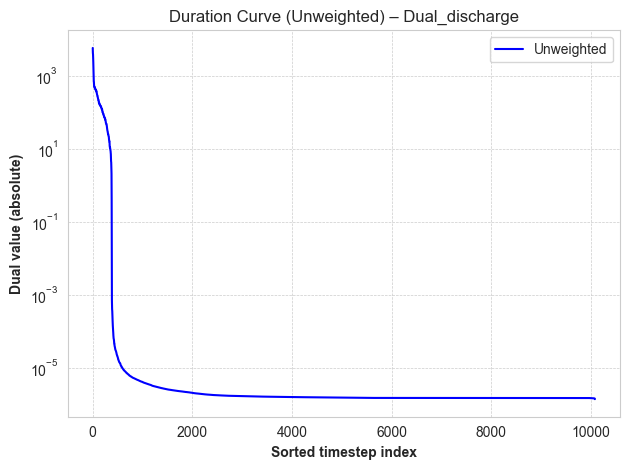

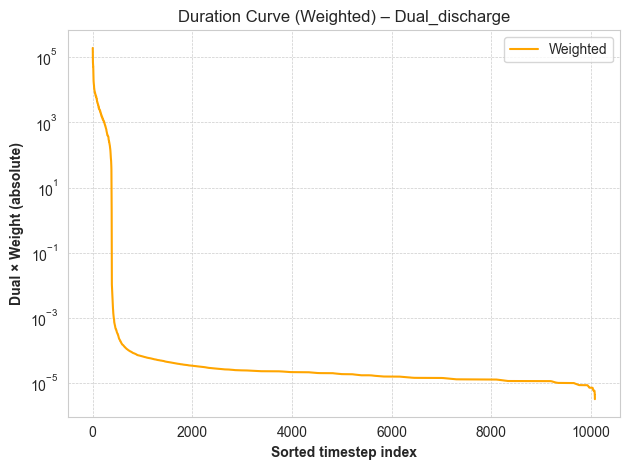

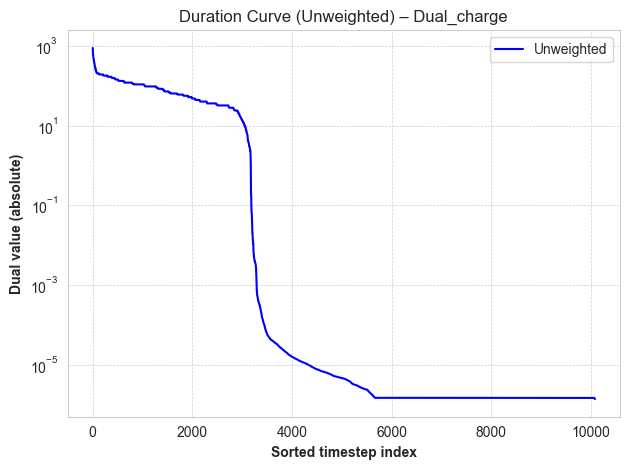

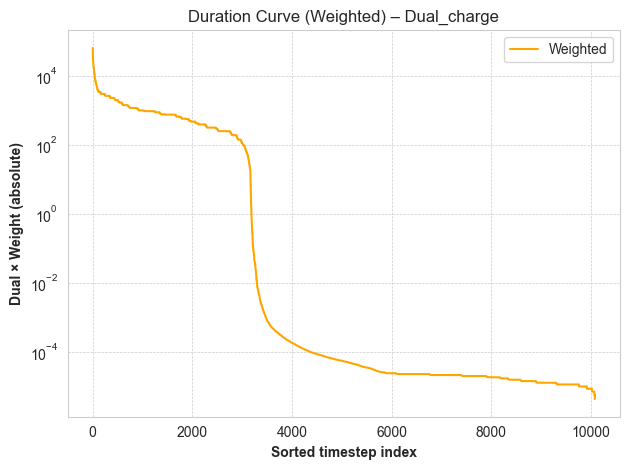

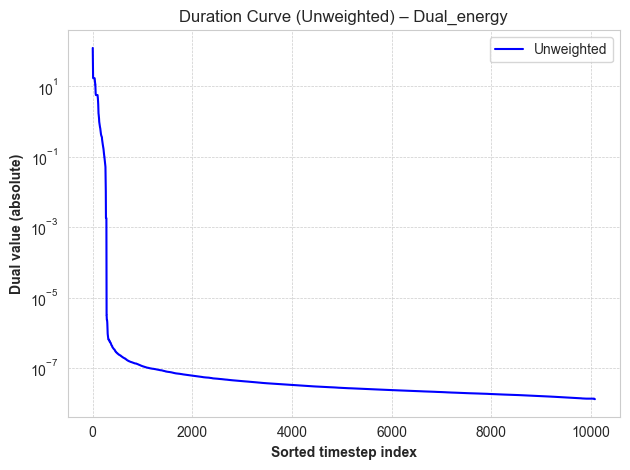

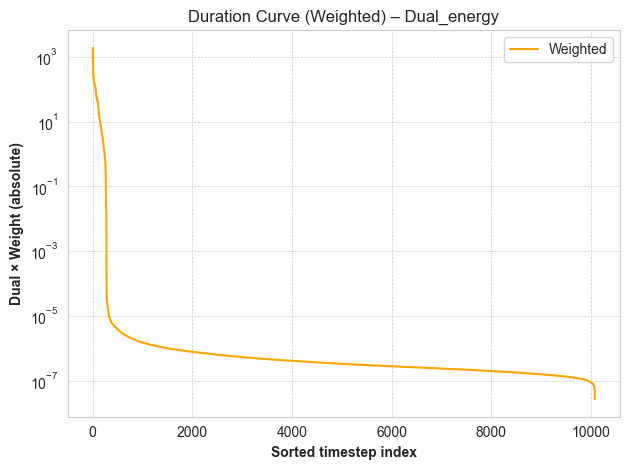

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_duration_curves_absolute(df, dual, weight_col='Weight'):
    abs_dual = df[dual].abs()
    weights = df[weight_col]

    # Sort values
    sorted_abs_dual = abs_dual.sort_values(ascending=False).reset_index(drop=True)
    sorted_weighted_dual = (abs_dual * weights).sort_values(ascending=False).reset_index(drop=True)

    # Plot 1: Unweighted
    plt.figure()
    plt.plot(sorted_abs_dual, label='Unweighted', color='blue')
    plt.yscale('log')
    plt.title(f"Duration Curve (Unweighted) – {dual}")
    plt.xlabel("Sorted timestep index")
    plt.ylabel("Dual value (absolute)")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.legend()

    # Plot 2: Weighted
    plt.figure()
    plt.plot(sorted_weighted_dual, label='Weighted', color='orange')
    plt.yscale('log')
    plt.title(f"Duration Curve (Weighted) – {dual}")
    plt.xlabel("Sorted timestep index")
    plt.ylabel("Dual × Weight (absolute)")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.legend()


def report_dual_activity(df, duals, threshold=1e-6, weight_col='Weight'):
    print(f"\n=== Frequency of Binding Constraints (|dual| > {threshold:.0e}) ===")
    
    total_timesteps = df.shape[0]
    total_weight = df[weight_col].sum()

    for dual in duals:
        abs_dual = df[dual].abs()
        is_binding = abs_dual > threshold

        # Unweighted frequency
        count_binding = is_binding.sum()
        percent_binding = 100 * count_binding / total_timesteps

        # Weighted frequency
        weight_binding = df.loc[is_binding, weight_col].sum()
        weight_percent = 100 * weight_binding / total_weight

        print(f"{dual}:")
        print(f"  Unweighted: {count_binding} binding steps ({percent_binding:.2f}%)")
        print(f"  Weighted:   {weight_binding:.2f} of total weight ({weight_percent:.2f}%)")


selected_storage = "H2"  # Change to "BESS" to analyze BESS
# Paths to the CSV files
#Update with correct paths
duals_path = r"...\scarcity_rent_delta_0.5.csv"
weights_path = r"...\concatenated_weights_672_30yr_new.csv"

# Make sure you use all scenarios
scenarios = [19, 12, 7, 11, 23, 8, 30, 24, 1, 26, 29, 13, 4, 22, 27]
storages = ["H2", "BESS"]
# Duals of interest
duals = ["Dual_discharge", "Dual_charge", "Dual_energy"]
threshold = 1e-6


# Load data
duals_df = pd.read_csv(duals_path)
weights_df = pd.read_csv(weights_path)
print(weights_df)
# Rename columns for clarity
weights_df.columns = ['Scenario', 'Time', 'Weight']


duals_df = duals_df[duals_df["Scenario"].isin(scenarios)]
duals_df = duals_df[duals_df["Storage"] == selected_storage]
weights_df = weights_df[weights_df["Scenario"].isin(scenarios)]
# Merge weights into duals dataframe
merged_df = pd.merge(duals_df, weights_df, how='left', on=['Scenario', 'Time'])

# Check for any NaNs in merged dataframe
if merged_df.isna().any().any():
    print("⚠️ Warning: There are missing (NaN) values in the merged dataframe.")
    print(merged_df.isna().sum())
    # Optional: stop execution if NaNs are critical
    # raise ValueError("Missing values found in merged dataframe. Check weights and merge keys.")
else:
    print("✅ No NaN values in merged dataframe.")



# === CONVERT DUALS TO ABSOLUTE VALUES ===
for dual in duals:
    merged_df[dual] = merged_df[dual].abs()
    

# === ANALYSIS ===
print(f"\n📦 Analyzing Storage Asset: {selected_storage}")    
report_dual_activity(merged_df, duals, threshold=threshold)

for dual in duals:
    plot_duration_curves_absolute(merged_df, dual)

plt.show()

✅ No NaN values in merged dataframe.

1. Energy level at end of each month:
 month  energy_level energy_percent
     1     97.614767         60.06%
     2     86.466840         53.20%
     3     72.722590         44.75%
     4     67.699578         41.66%
     5     98.640617         60.69%
     6     84.481630         51.98%
     7     77.694112         47.81%
     8     63.592872         39.13%
     9     75.646849         46.55%
    10    106.505437         65.53%
    11     83.937095         51.65%
    12    146.930520         90.41%

2. Average weighted charging hours per scenario (>1e-06 MW): 4600.60 hours
   Average weighted discharging hours per scenario (>1e-06 MW): 5199.00 hours

3. Average energy charged per scenario (>1e-06 MW): 6136.46 MWh
   Average energy discharged per scenario (>1e-06 MW): 2362.23 MWh


C:\Users\user\AppData\Local\Temp\ipykernel_17040\4048777906.py:104: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby("SOC Bin (%)")["time_weight"]


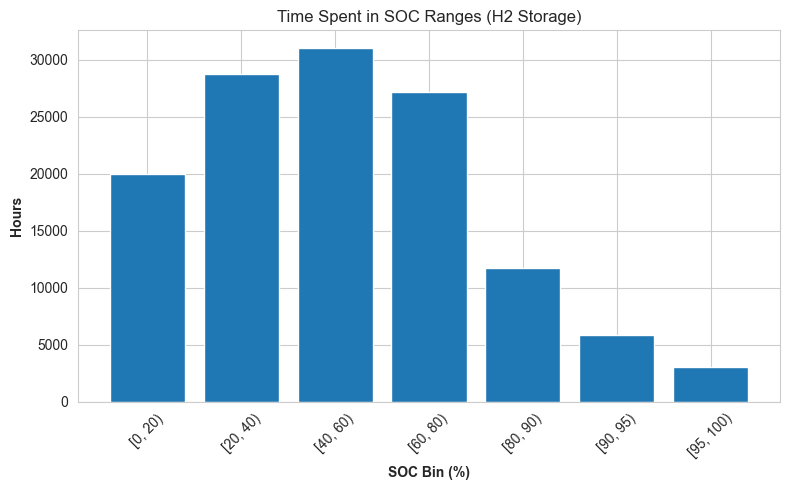

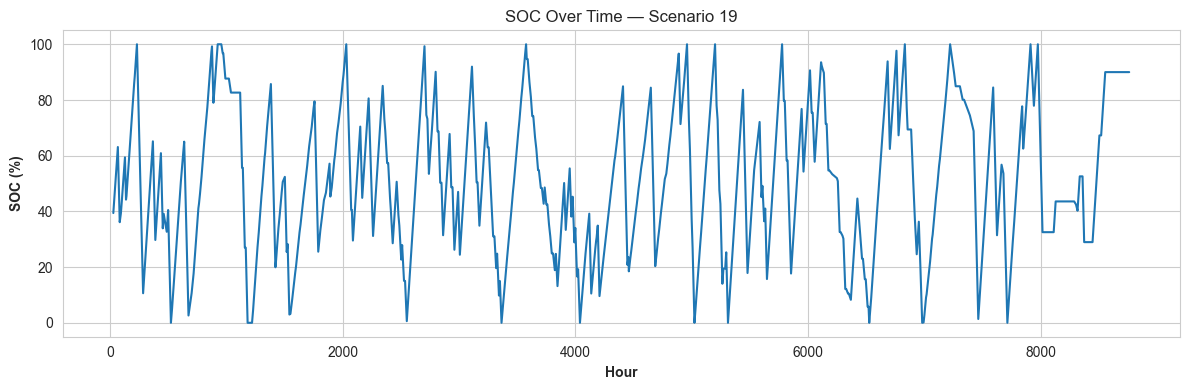


 Total time at or near FULL (≥ 99%): 3946.00 hours
 Total time at or near EMPTY (≤ 1%): 4000.00 hours

 Total H₂ charged into storage: 92046.86 MWh
 Total H₂ discharged from storage: 35433.50 MWh


C:\Users\user\AppData\Local\Temp\ipykernel_17040\4048777906.py:194: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discharge_cycles.groupby("Depth Bin (%)")["Weighted Hours"]


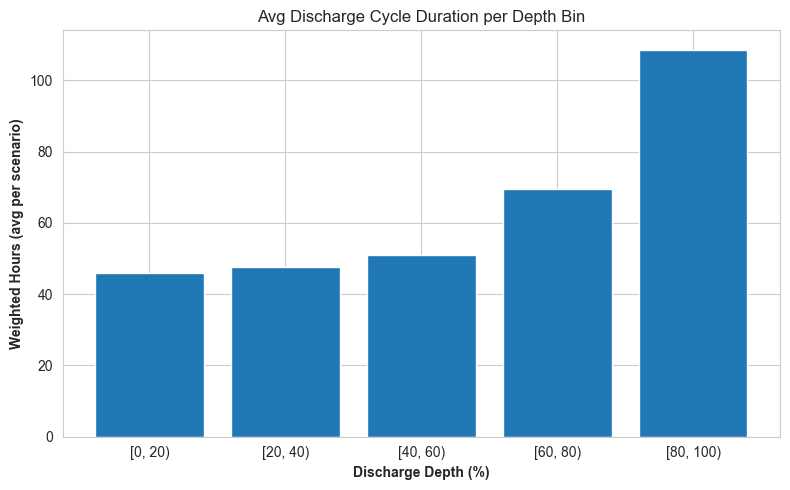

In [ ]:
import pandas as pd

# Constants
selected_storage = "H2"
scenarios = [19, 12, 7, 11, 23, 8, 30, 24, 1, 26, 29, 13, 4, 22, 27]
ENERGY_CAPACITY = 162.522716388603  # MWh

# File paths
#Update with correct paths
energy_data_path = r"...\energy_charge_discharge_delta_0.5.csv"
weights_path = r"...\concatenated_weights_672_30yr_new.csv"

# Load CSVs
energy_df = pd.read_csv(energy_data_path)
weights_df = pd.read_csv(weights_path)

# Rename columns for clarity
weights_df = weights_df.rename(columns={"O": "Scenario", "T": "Time", "value": "time_weight"})

# Apply filtering
energy_df = energy_df[energy_df["Scenario"].isin(scenarios)]
energy_df = energy_df[energy_df["Storage"] == selected_storage]
weights_df = weights_df[weights_df["Scenario"].isin(scenarios)]

# Merge both dataframes on Scenario and Time
merged_df = pd.merge(energy_df, weights_df, on=["Scenario", "Time"], how="left")

# Check for NaNs
if merged_df.isna().any().any():
    print("⚠️ Warning: There are missing (NaN) values in the merged dataframe.")
    print(merged_df.isna().sum())
    # Optional: stop execution if NaNs are critical
    # raise ValueError("Missing values found in merged dataframe. Check weights and merge keys.")
else:
    print("✅ No NaN values in merged dataframe.")

# Calculate cumulative time (hours) for each scenario
merged_df["cumulative_hour"] = merged_df.groupby("Scenario")["time_weight"].cumsum()
merged_df["hour_rounded"] = merged_df["cumulative_hour"].round().astype(int)

# Assign month based on rounded hour (730 hours/month)
#merged_df["month"] = ((merged_df["hour_rounded"] - 1) // 730 + 1).clip(upper=12)
merged_df["month"] = ((merged_df["hour_rounded"] - 1) // 730 + 1)

# 1. Energy Level at End of Each Month
monthly_energy = (
    merged_df.sort_values(["Scenario", "cumulative_hour"])
    .groupby(["Scenario", "month"])
    .tail(1)
    .groupby("month")["energy_level"]
    .mean()
    .reset_index()
)
monthly_energy["energy_percent"] = 100 * monthly_energy["energy_level"] / ENERGY_CAPACITY

print("\n1. Energy level at end of each month:")
print(monthly_energy.to_string(index=False, formatters={"energy_percent": "{:.2f}%".format}))



# Threshold for meaningful charge/discharge (in MW)
CHARGE_DISCHARGE_THRESHOLD = 1e-6 # Adjust as needed

# Filter based on threshold
charging_mask = merged_df["Charge"] > CHARGE_DISCHARGE_THRESHOLD
discharging_mask = merged_df["Discharge"] > CHARGE_DISCHARGE_THRESHOLD

# 2. Charging/discharging hours per scenario (with threshold)
charging_by_scenario = merged_df[charging_mask].groupby("Scenario")["time_weight"].sum()
discharging_by_scenario = merged_df[discharging_mask].groupby("Scenario")["time_weight"].sum()

charging_hours_avg = charging_by_scenario.mean()
discharging_hours_avg = discharging_by_scenario.mean()

print(f"\n2. Average weighted charging hours per scenario (>{CHARGE_DISCHARGE_THRESHOLD} MW): {charging_hours_avg:.2f} hours")
print(f"   Average weighted discharging hours per scenario (>{CHARGE_DISCHARGE_THRESHOLD} MW): {discharging_hours_avg:.2f} hours")

# 3. Total energy charged/discharged per scenario (with threshold)
merged_df["charged_energy_MWh"] = merged_df["Charge"] * merged_df["time_weight"]
merged_df["discharged_energy_MWh"] = merged_df["Discharge"] * merged_df["time_weight"]

energy_by_scenario = merged_df[charging_mask | discharging_mask].groupby("Scenario")[["charged_energy_MWh", "discharged_energy_MWh"]].sum()

avg_charged_energy = energy_by_scenario["charged_energy_MWh"].mean()
avg_discharged_energy = energy_by_scenario["discharged_energy_MWh"].mean()

print(f"\n3. Average energy charged per scenario (>{CHARGE_DISCHARGE_THRESHOLD} MW): {avg_charged_energy:.2f} MWh")
print(f"   Average energy discharged per scenario (>{CHARGE_DISCHARGE_THRESHOLD} MW): {avg_discharged_energy:.2f} MWh")

#!pip install fatpack
!pip install rainflow
#rainflow algorithm
import numpy as np
import pandas as pd
#from fatpack import find_peaks, rainflow_cycles
import rainflow
# --- Compute SOC (%)
merged_df["SOC"] = 100 * merged_df["energy_level"] / ENERGY_CAPACITY

# === 1. Histogram: Time spent in each SOC range (recommended bins for H₂)
soc_bins = [0, 20, 40, 60, 80, 90, 95, 100]
merged_df["SOC Bin (%)"] = pd.cut(merged_df["SOC"], bins=soc_bins, right=False)

soc_time = (
    merged_df.groupby("SOC Bin (%)")["time_weight"]
    .sum()
    .reset_index(name="Total Hours")
)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(soc_time["SOC Bin (%)"].astype(str), soc_time["Total Hours"])
plt.title("Time Spent in SOC Ranges (H2 Storage)")
plt.ylabel("Hours")
plt.xlabel("SOC Bin (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# === 2. Plot: SOC over time (pick one scenario)
example_scenario = scenarios[0]
scenario_df = merged_df[merged_df["Scenario"] == example_scenario].sort_values("cumulative_hour")

plt.figure(figsize=(12, 4))
plt.plot(scenario_df["cumulative_hour"], scenario_df["SOC"], label=f"Scenario {example_scenario}")
plt.title(f"SOC Over Time — Scenario {example_scenario}")
plt.xlabel("Hour")
plt.ylabel("SOC (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 3. Time spent at full / empty
SOC_FULL_THRESH = 99  # can adjust
SOC_EMPTY_THRESH = 1

full_time = merged_df.loc[merged_df["SOC"] >= SOC_FULL_THRESH, "time_weight"].sum()
empty_time = merged_df.loc[merged_df["SOC"] <= SOC_EMPTY_THRESH, "time_weight"].sum()

print(f"\n Total time at or near FULL (≥ {SOC_FULL_THRESH}%): {full_time:.2f} hours")
print(f" Total time at or near EMPTY (≤ {SOC_EMPTY_THRESH}%): {empty_time:.2f} hours")

# === 4. Throughput calculation (total H2 in/out)
THRESH = 1e-6  # MW, to filter out noise

charge_energy = (
    merged_df.loc[merged_df["Charge"] > THRESH, "Charge"] *
    merged_df.loc[merged_df["Charge"] > THRESH, "time_weight"]
).sum()

discharge_energy = (
    merged_df.loc[merged_df["Discharge"] > THRESH, "Discharge"] *
    merged_df.loc[merged_df["Discharge"] > THRESH, "time_weight"]
).sum()

print(f"\n Total H₂ charged into storage: {charge_energy:.2f} MWh")
print(f" Total H₂ discharged from storage: {discharge_energy:.2f} MWh")

# === 5. Rainflow: Cycle frequency and depth
def compute_discharge_cycles(df, scenario_id):
    df_scen = df[df["Scenario"] == scenario_id].sort_values("cumulative_hour").reset_index(drop=True)
    soc_series = df_scen["SOC"].values
    time_weights = df_scen["time_weight"].values
    cycles = rainflow.extract_cycles(soc_series)

    cycle_data = []
    for amp, mean, count, idx_start, idx_end in cycles:
        if idx_end >= len(time_weights):
            continue
        if soc_series[idx_end] < soc_series[idx_start]:  # Only discharging
            cycle_depth = 2 * amp
            cycle_duration = time_weights[idx_start:idx_end + 1].sum()
            weighted_hours = count * cycle_duration
            cycle_data.append({
                "Discharge Depth (%)": cycle_depth,
                "Count": count,
                "Weighted Hours": weighted_hours,
                "Scenario": scenario_id
            })
    return pd.DataFrame(cycle_data)

# Apply to all scenarios
discharge_cycles = pd.concat(
    [compute_discharge_cycles(merged_df, s) for s in scenarios],
    ignore_index=True
)

# Bin by discharge depth (recommended for H2: broader)
depth_bins = [0, 20, 40, 60, 80, 100]
discharge_cycles["Depth Bin (%)"] = pd.cut(discharge_cycles["Discharge Depth (%)"], bins=depth_bins, right=False)

# Summarize
depth_summary = (
    discharge_cycles.groupby("Depth Bin (%)")["Weighted Hours"]
    .mean()
    .reset_index(name="Avg Cycle Hours")
)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(depth_summary["Depth Bin (%)"].astype(str), depth_summary["Avg Cycle Hours"])
plt.title("Avg Discharge Cycle Duration per Depth Bin")
plt.xlabel("Discharge Depth (%)")
plt.ylabel("Weighted Hours (avg per scenario)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
using Distributions
using RiskMeasures

function tail_stats(values; ψ=0.5, ids=1:length(values))
    n = length(values)
    p = fill(1/n, n)                          # uniform weights
    dist = DiscreteNonParametric(values, p)

    varψ  = quantile(dist, ψ)
    cvarψ = CVaR(dist, ψ)

    # worst scenarios = those in the ψ-tail (values ≤ VaRψ)
    worst_ids = [ids[i] for i in eachindex(values) if values[i] ≤ varψ]
    return varψ, cvarψ, worst_ids
end

# --- Data ---
scenarios = [19, 12, 7, 11, 23, 8, 30, 24, 1, 26, 29, 13, 4, 22, 27]

Rev_Scarcity_Power= [1.527999e+06,
1.036706e+06,
1.142551e+06,
1.111142e+06,
1.003503e+06,
9.455342e+05,
1.156750e+06,
4.901281e+05,
5.587174e+05,
8.011672e+05,
1.022284e+06,
1.038124e+06,
1.002632e+06,
1.378047e+06,
1.166900e+06]

Rev_Scarcity_Energy=[2.669809e+06,
3.039310e+06,
6.307712e+06,
4.472230e+06,
4.565956e+06,
4.746001e+06,
3.026259e+06,
4.251631e+06,
2.908035e+06,
4.467272e+06,
2.939294e+06,
4.076352e+06,
3.869013e+06,
2.728486e+06,
3.391081e+06]

# --- Compute worst 50% tails ---
varP, cvarP, worstP = tail_stats(Rev_Scarcity_Power;  ψ=0.5, ids=scenarios)
varE, cvarE, worstE = tail_stats(Rev_Scarcity_Energy; ψ=0.5, ids=scenarios)

println("Power:  VaR50 = $varP,  CVaR50 = $cvarP,  worst 50% scenarios = $worstP")
println("Energy: VaR50 = $varE,  CVaR50 = $cvarE,  worst 50% scenarios = $worstE")



Power:  VaR50 = 1.036706e6,  CVaR50 = (value = 845642.5200000001, pmf = DiscreteNonParametric{Float64, Float64, Vector{Float64}, Vector{Float64}}(
support: [490128.1, 558717.4, 801167.2, 945534.2, 1.002632e6, 1.003503e6, 1.022284e6, 1.036706e6, 1.038124e6, 1.111142e6, 1.142551e6, 1.15675e6, 1.1669e6, 1.378047e6, 1.527999e6]
p: [0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.06666666666666682, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
)
),  worst 50% scenarios = [12, 23, 8, 24, 1, 26, 29, 4]
Energy: VaR50 = 3.869013e6,  CVaR50 = (value = 3.0182374000000004e6, pmf = DiscreteNonParametric{Float64, Float64, Vector{Float64}, Vector{Float64}}(
support: [2.669809e6, 2.728486e6, 2.908035e6, 2.939294e6, 3.026259e6, 3.03931e6, 3.391081e6, 3.869013e6, 4.076352e6, 4.251631e6, 4.467272e6, 4.47223e6, 4.565956e6, 4.746001e6, 6.307712e6]
p: [0.13333333333333333, 0.13333333333333333, 0.13333333333333333, 0.13